In [1]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### import data set and cleaning the data

In [2]:
# upload date set into data frame
df = pd.read_csv("/Users/OzlemCelik/Desktop/NEW_YORK.csv",skiprows=4, thousands=",")

# number of datapoints
print("Number of data points: ", len(df))

#rename the columns name
df.rename(columns= {'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                   'Rape\n(revised\ndefinition)1':'Rape1',
                   'Rape\n(legacy\ndefinition)2':'Rape'}, inplace= True)

## drop columns with all NaN
df.drop('Rape1', axis=1, inplace = True)
df.dropna(how='any', inplace=True)

Number of data points:  351


In [3]:
df.head()

,City,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
6,Allegany Village,1781.0,3.0,0.0,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0


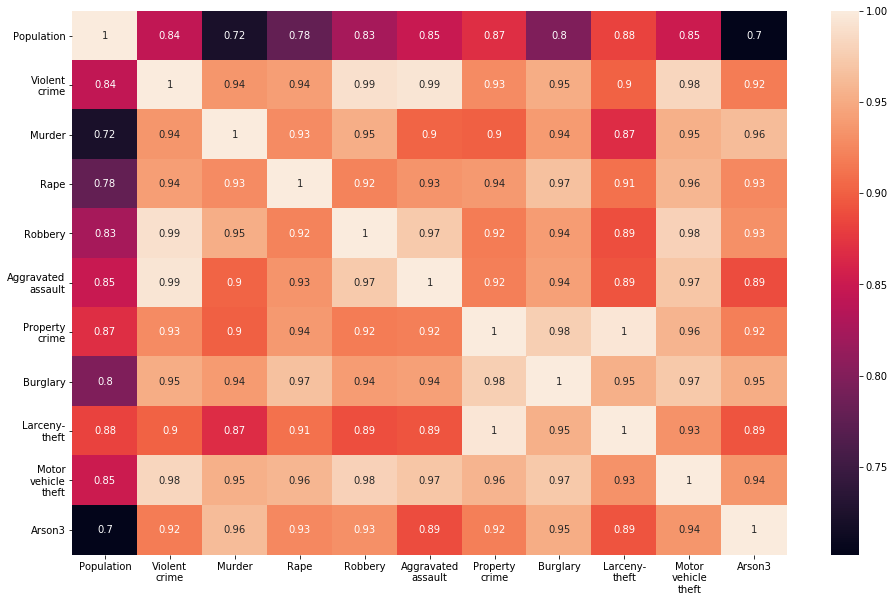

In [4]:
#Correlation matrix before complete the data with mean.
fig = plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
features = df.loc[:,['Population','Murder', 'Robbery' ]]
features['Population_sq'] = features.Population**2
features['robbery'] = np.where(features.Robbery >0 , 1, 0)
features['murder'] = np.where(features.Murder >0, 1, 0)
features.head()

,Population,Murder,Robbery,Population_sq,robbery,murder
0,1861.0,0.0,0.0,3.463321e+06,0,0
1,2577.0,0.0,0.0,6.640929e+06,0,0
2,2846.0,0.0,0.0,8.099716e+06,0,0
6,1781.0,0.0,0.0,3.171961e+06,0,0
7,118296.0,1.0,31.0,1.399394e+10,1,1


### KNN Regression

In [131]:
#X = df[['Population','Murder','Robbery','Aggravated\nassault','Arson3']]

X = df[['Population']]
y = df['Property\ncrime']

#Splitting the dataset into the Training ang Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =0)

In [134]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [154]:
#fitting regression without weights
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=7)
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [155]:
# Fitting regression with weights.
regressor_w = KNeighborsRegressor(n_neighbors=7, weights='distance')
regressor_w.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

In [156]:
y_pred=regressor.predict(X_test)

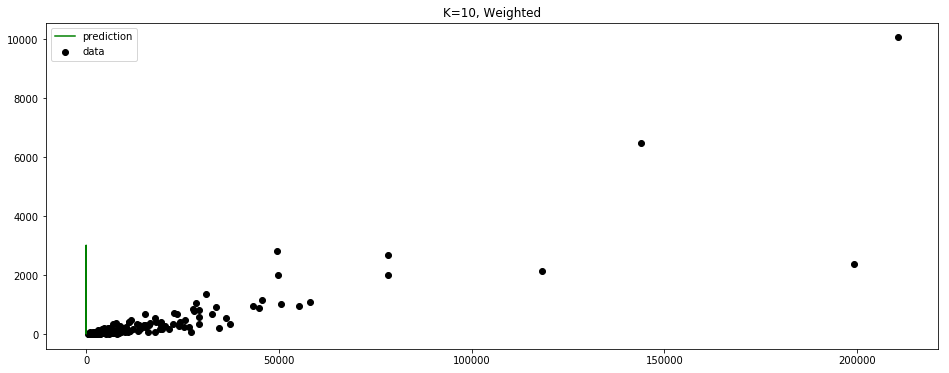

In [160]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

plt.scatter(X, y, c='k', label='data')
plt.plot(X_test, y_pred, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [158]:
## Cross_validation with 5_fold divison
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train, cv=5)

## Avg cross-validation score and variance of the score. 
print("Regression Accuracy without weights: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

## Avg cross-validation score and variance of the score with weights.
score_w = cross_val_score(regressor_w, X_train, y_train, cv=5)
print("Regression Accuracy with weights: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Regression Accuracy without weights: 0.59 (+/- 0.32)
Regression Accuracy with weights: 0.59 (+/- 0.32)


### OLS Regression

In [161]:
#Fitting Simple Linear Regrssion to the Training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
#Predicting the Test set Result
y_pred = regressor.predict(X_test)

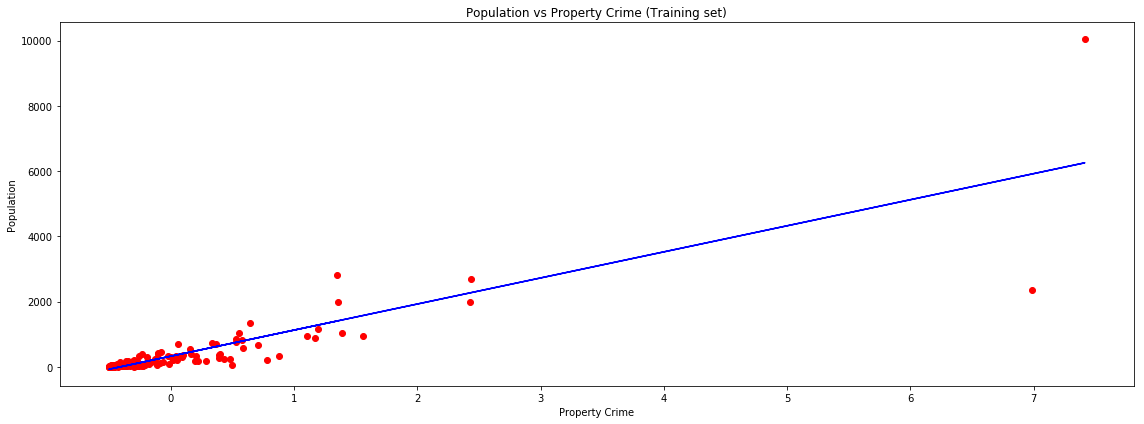

In [165]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

plt.scatter(X_train,y_train, color= 'red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Population vs Property Crime (Training set)')
plt.xlabel('Property Crime')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

In [166]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train, cv=5)

## Avg cross-validation score and variance of the score. 
print("OLS Regression Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


OLS Regression Accuracy: 0.66 (+/- 0.31)


In this case, clearly, ordinary linear regression worked a lot better then KNN method.